# This type is same to the final type(change copy1) just adjust the format

In [ ]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import math
import numpy as np
from datetime import datetime, timedelta, date
import time
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

# Data processing

In [3]:
file_path = 'QQQ.xlsx'
df = pd.read_excel(file_path)
print(df)

                       Date                Time Symbol      Open      High  \
0       2023-08-31 19:59:00 2023-08-31 19:59:00    QQQ  377.9800  378.0200   
1       2023-08-31 19:58:00 2023-08-31 19:58:00    QQQ  377.9500  377.9500   
2       2023-08-31 19:57:00 2023-08-31 19:57:00    QQQ  377.9900  377.9999   
3       2023-08-31 19:56:00 2023-08-31 19:56:00    QQQ  377.9600  377.9600   
4       2023-08-31 19:55:00 2023-08-31 19:55:00    QQQ  377.9699  378.0100   
...                     ...                 ...    ...       ...       ...   
1019059 2018-09-04 04:25:00 2018-09-04 04:25:00    QQQ  187.1100  187.1200   
1019060 2018-09-04 04:19:00 2018-09-04 04:19:00    QQQ  187.1300  187.1300   
1019061 2018-09-04 04:16:00 2018-09-04 04:16:00    QQQ  187.0900  187.0900   
1019062 2018-09-04 04:14:00 2018-09-04 04:14:00    QQQ  187.2000  187.2000   
1019063 2018-09-04 04:07:00 2018-09-04 04:07:00    QQQ  187.2200  187.3000   

              Low     Close  Volume  
0        377.9700  378.02

## 1. 补缺失值/保留9:30-16:00/看了日内特征和周内特征
## 1. Add missing value/retain 9:30 -16:00/look at intra-day and intra-week features

In [5]:
# Convert the 'Date' column to datetime format
df['Datetime'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S')

 # Set 'Datetime' as the index and drop unnecessary columns
df.set_index('Datetime', inplace=True)
df.drop(columns=['Date', 'Time'], inplace=True)

# 如果Volume不是数值类型，则转换
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')

# Remove any NaN values
df.dropna(subset=['Volume'], inplace=True)

# 为缺失的分钟补0 Add 0 for vacant
df = df.resample('T').asfreq().fillna(0)

df_resampled = df.resample('15T').sum()
df_resampled.index = pd.to_datetime(df_resampled.index)
df_resampled.index = df_resampled.index.astype(str)

#因为美股开盘收盘时间为9：30-16:00 stock marcket open and close time is 9：30-16:00
df_resampled.index = pd.to_datetime(df_resampled.index)
start_time = datetime.strptime('09:30', '%H:%M').time()
end_time = datetime.strptime('16:00', '%H:%M').time()
mask = (df_resampled.index.time >= start_time) & (df_resampled.index.time <= end_time)
df = df_resampled[mask]
df = df.dropna()

df = df.loc['2020-01-01 09:30':]
df

,Open,High,Low,Close,Volume
Datetime,,,,,
2020-01-01 09:30:00,0.0000,0.0000,0.0000,0.0000,0.0
2020-01-01 09:45:00,0.0000,0.0000,0.0000,0.0000,0.0
2020-01-01 10:00:00,0.0000,0.0000,0.0000,0.0000,0.0
2020-01-01 10:15:00,0.0000,0.0000,0.0000,0.0000,0.0
2020-01-01 10:30:00,0.0000,0.0000,0.0000,0.0000,0.0
...,...,...,...,...,...
2023-08-31 15:00:00,5680.8373,5682.2750,5679.9114,5681.2730,658377.0
2023-08-31 15:15:00,5683.4544,5684.4101,5682.1879,5683.3616,595590.0
2023-08-31 15:30:00,5684.1963,5685.3850,5683.3066,5684.7036,635705.0


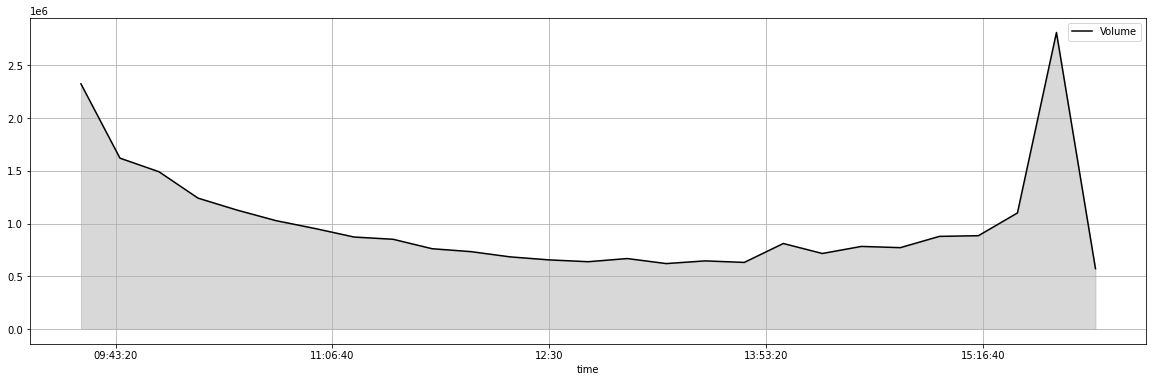

In [6]:
# 每日同一时点加和求均值 Average everyday same time
mean_by_time = df.groupby(df.index.time).mean()
mean_by_time[['Volume']].plot(color='black', figsize=(20, 6), grid=True)
plt.fill_between(mean_by_time.index, mean_by_time['Volume'], color='gray', alpha=0.3)

<AxesSubplot:xlabel='Datetime'>

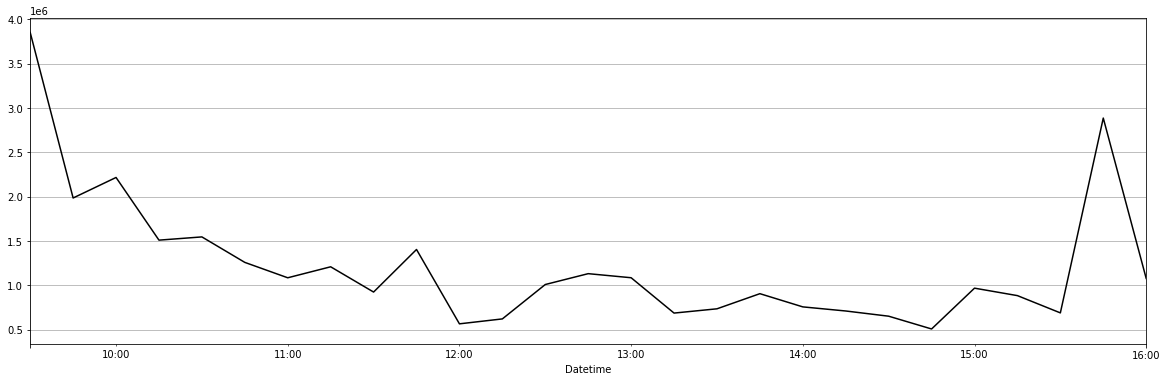

In [7]:
df_20230803 = df.loc['2023-08-03']
df_20230803['Volume'].plot(color='black', figsize=(20, 6), grid=True)

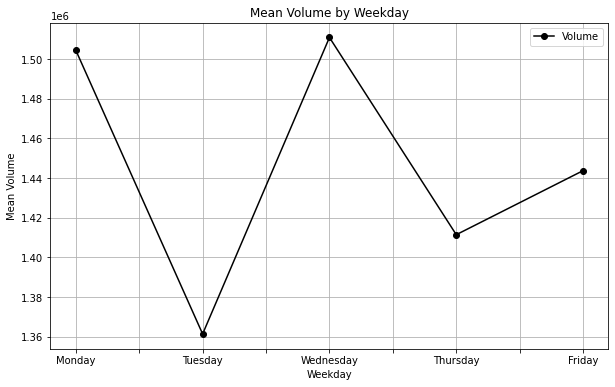

In [17]:
df.loc[:, 'Weekday'] = df.index.day_name()
#print(df2)

mean_by_weekday = df.groupby('Weekday').mean()
weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
mean_by_weekday.index = weekday_labels

mean_by_weekday[['Volume']].plot(color='black', figsize=(10, 6), grid=True, marker='o')

plt.xlabel('Weekday')
plt.ylabel('Mean Volume')
plt.title('Mean Volume by Weekday')
plt.legend(['Volume'])
plt.show()

上图可以看出 符合通常的周一和周五交易比较多的情况 值得一提的是周三交易量也较多 说明周内不同工作日存在一定的差异
The chart above shows that, in line with the usual pattern of Monday and Friday trading, there was also a lot of volume on Wednesday, indicating that there are some differences between the working days of the week

array([<AxesSubplot:xlabel='Datetime'>], dtype=object)

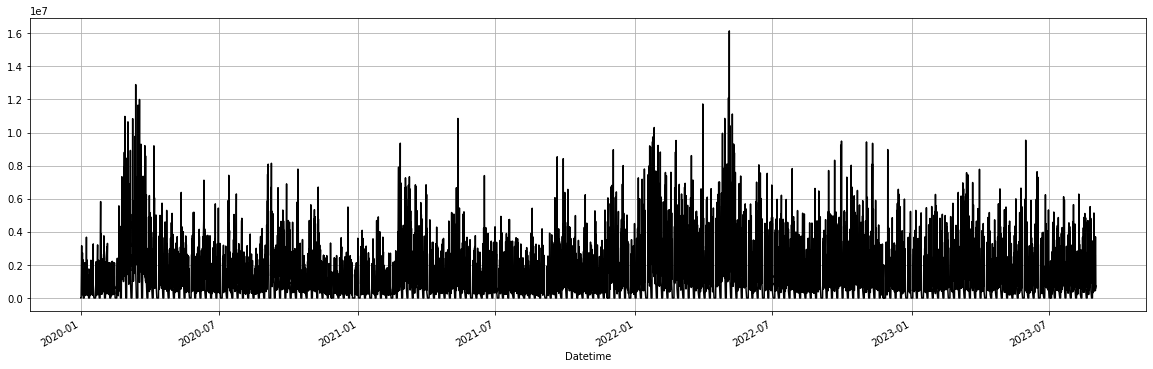

In [11]:
df['Volume'].plot(subplots=True, color='black',figsize=(20, 6), grid=True, )

In [ ]:
# 将索引转换为 datetime 类型 index to datetime
df.index = pd.to_datetime(df.index)

# 筛选出第一列中包含 0 的行并显示 shows columns with 0
rows_with_zero = df[df['Open'] == 0]
#print(rows_with_zero)
df = df[df['Open'] != 0]
#print(df)

美股市场的提前收盘日期。美股市场在某些特殊日子，特别是节假日的前一天通常会提前关闭。这些通常包括感恩节后的黑色星期五、圣诞节前夕、独立日前一天等。在这些日子里，市场通常会在美东时间下午1:00（13:00）关闭，而不是常规的下午4:00（16:00）
An early closing date for the U. S. Stock Market. The U. S. stock market usually closes early on special days, especially the day before a holiday. These usually include Black Friday after Thanksgiving, Christmas Eve, the day before Independence Day, and so on. On these days, markets usually close at 1:00 p.m. (13:00) Eastern time, rather than the usual 4:00 p.m. (16:00) .

In [14]:
# 计算每日数据数量 counts numbers of each day's volume
daily_counts = df.index.to_series().dt.date.value_counts()
# 找出非27天的日期 find the day special(non27)
non_27_days = daily_counts[daily_counts != 27]
print(non_27_days)

2023-07-03    16
2020-12-24    16
2021-11-26    16
2022-11-25    16
2020-11-27    16
Name: Datetime, dtype: int64


In [15]:
# Assuming non_27_days_index is created correctly and contains datetime-like objects
non_27_days_index = pd.Index(non_27_days.index)

# Convert the DataFrame index to date-only format if it's in datetime format
df_index_as_date = df.index.normalize()

# Filter out the non 27 days
df2 = df[~df_index_as_date.isin(non_27_days_index)]

print(df2)

                          Open       High        Low      Close     Volume  \
Datetime                                                                     
2020-01-02 09:30:00  3222.0242  3223.5637  3221.1500  3222.5240  3156623.0   
2020-01-02 09:45:00  3223.0966  3224.0507  3222.4287  3223.2155  1074391.0   
2020-01-02 10:00:00  3222.3200  3222.9250  3221.2300  3221.7218   985951.0   
2020-01-02 10:15:00  3213.7430  3214.6533  3212.4418  3213.6835  1100095.0   
2020-01-02 10:30:00  3214.1012  3214.7300  3213.2952  3214.0320   643005.0   
...                        ...        ...        ...        ...        ...   
2023-08-31 15:00:00  5680.8373  5682.2750  5679.9114  5681.2730   658377.0   
2023-08-31 15:15:00  5683.4544  5684.4101  5682.1879  5683.3616   595590.0   
2023-08-31 15:30:00  5684.1963  5685.3850  5683.3066  5684.7036   635705.0   
2023-08-31 15:45:00  5681.4750  5682.4340  5679.0701  5680.3241  3695453.0   
2023-08-31 16:00:00  5672.2400  5673.2400  5671.4700  5672.4200 

In [16]:
print("Skewness偏度: ", df2["Volume"].skew())
print("Kurtosis峰度: ", df2["Volume"].kurt())
print("Median中位数: ", df2["Volume"].median())
print("10th percentile: ", df2["Volume"].quantile(0.1))
print("90th percentile: ", df2["Volume"].quantile(0.9))
minmaxrange = df2["Volume"].max() - df2["Volume"].min()
print("范围minmaxrange: ", minmaxrange)
cv = df2["Volume"].std() / df2["Volume"].mean()
print("Coefficient of variation变异系数: ", cv)
df2["Volume"].describe()

Skewness偏度:  2.5948258266743474
Kurtosis峰度:  10.738602318383053
Median中位数:  1100175.5
10th percentile:  470267.5
90th percentile:  2847334.5
范围minmaxrange:  16134403.0
Coefficient of variation变异系数:  0.8105874810973628


count    2.478600e+04
mean     1.449008e+06
std      1.174548e+06
min      5.500000e+03
25%      7.064938e+05
50%      1.100176e+06
75%      1.774146e+06
max      1.613990e+07
Name: Volume, dtype: float64

# 2. Time Features 

## 1. Add weekday and indextime

In [19]:
df2.loc[:, 'Weekday'] = df2.index.day_name()
#print(df2)
remaining_dates_count = df2.index.normalize().nunique()
print(remaining_dates_count)

918


In [21]:
timeseq = []
for d in range(0,918):
    i = 0
    for t in range(0,27):
        i += 1
        timeseq.append(i) 
timeseq = pd.DataFrame(timeseq)
df2['index_time'] = timeseq.values
df2

C:\Users\lenovo\AppData\Local\Temp\ipykernel_19868\1226343415.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['index_time'] = timeseq.values


,Open,High,Low,Close,Volume,Weekday,index_time
Datetime,,,,,,,
2020-01-02 09:30:00,3222.0242,3223.5637,3221.1500,3222.5240,3156623.0,Thursday,1
2020-01-02 09:45:00,3223.0966,3224.0507,3222.4287,3223.2155,1074391.0,Thursday,2
2020-01-02 10:00:00,3222.3200,3222.9250,3221.2300,3221.7218,985951.0,Thursday,3
2020-01-02 10:15:00,3213.7430,3214.6533,3212.4418,3213.6835,1100095.0,Thursday,4
2020-01-02 10:30:00,3214.1012,3214.7300,3213.2952,3214.0320,643005.0,Thursday,5
...,...,...,...,...,...,...,...
2023-08-31 15:00:00,5680.8373,5682.2750,5679.9114,5681.2730,658377.0,Thursday,23
2023-08-31 15:15:00,5683.4544,5684.4101,5682.1879,5683.3616,595590.0,Thursday,24
2023-08-31 15:30:00,5684.1963,5685.3850,5683.3066,5684.7036,635705.0,Thursday,25


## 2. 循环编码 cyclical encoding with sine/cosine transformation

In [22]:
day_mapping = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4
}
df2['numeric_day'] = df2['Weekday'].map(day_mapping)
df2['sin_weekday'] = np.sin(2 * np.pi * df2['numeric_day'] / 5)
df2['cos_weekday'] = np.cos(2 * np.pi * df2['numeric_day'] / 5)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_19868\799157226.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['numeric_day'] = df2['Weekday'].map(day_mapping)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_19868\799157226.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['sin_weekday'] = np.sin(2 * np.pi * df2['numeric_day'] / 5)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_19868\799157226.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

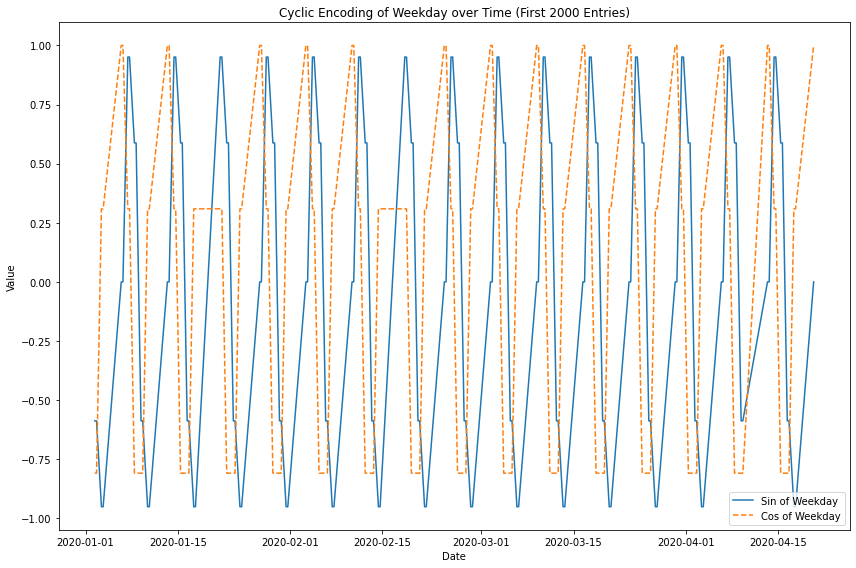

In [23]:
plt.figure(figsize=(12, 8))
plt.plot(df2.index[:2000], df2['sin_weekday'][:2000], label='Sin of Weekday')
plt.plot(df2.index[:2000], df2['cos_weekday'][:2000], label='Cos of Weekday', linestyle='--')
plt.title('Cyclic Encoding of Weekday over Time (First 2000 Entries)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()

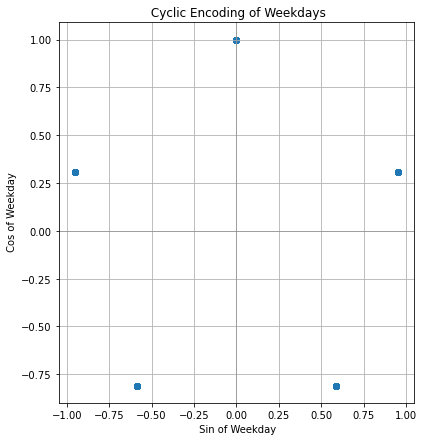

In [24]:
plt.figure(figsize=(14, 7))

# Plot for cyclic encoding of weekdays
plt.subplot(1, 2, 1)
plt.scatter(df2['sin_weekday'], df2['cos_weekday'])
plt.title(' Cyclic Encoding of Weekdays')
plt.xlabel(' Sin of Weekday')
plt.ylabel(' Cos of Weekday')
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.grid(True)

In [26]:
df2['sin_time'] = np.sin(2 * np.pi * df2['index_time'] / 27.0)
df2['cos_time'] = np.cos(2 * np.pi * df2['index_time'] / 27.0)
df2

,Open,High,Low,Close,Volume,Weekday,index_time,numeric_day,sin_weekday,cos_weekday,sin_time,cos_time
Datetime,,,,,,,,,,,,
2020-01-02 09:30:00,3222.0242,3223.5637,3221.1500,3222.5240,3156623.0,Thursday,1,3,-0.587785,-0.809017,2.306159e-01,0.973045
2020-01-02 09:45:00,3223.0966,3224.0507,3222.4287,3223.2155,1074391.0,Thursday,2,3,-0.587785,-0.809017,4.487992e-01,0.893633
2020-01-02 10:00:00,3222.3200,3222.9250,3221.2300,3221.7218,985951.0,Thursday,3,3,-0.587785,-0.809017,6.427876e-01,0.766044
2020-01-02 10:15:00,3213.7430,3214.6533,3212.4418,3213.6835,1100095.0,Thursday,4,3,-0.587785,-0.809017,8.021232e-01,0.597159
2020-01-02 10:30:00,3214.1012,3214.7300,3213.2952,3214.0320,643005.0,Thursday,5,3,-0.587785,-0.809017,9.182161e-01,0.396080
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-31 15:00:00,5680.8373,5682.2750,5679.9114,5681.2730,658377.0,Thursday,23,3,-0.587785,-0.809017,-8.021232e-01,0.597159
2023-08-31 15:15:00,5683.4544,5684.4101,5682.1879,5683.3616,595590.0,Thursday,24,3,-0.587785,-0.809017,-6.427876e-01,0.766044
2023-08-31 15:30:00,5684.1963,5685.3850,5683.3066,5684.7036,635705.0,Thursday,25,3,-0.587785,-0.809017,-4.487992e-01,0.893633


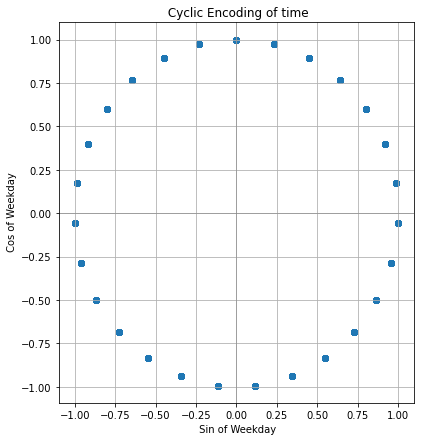

In [27]:
plt.figure(figsize=(14, 7))

# Plot for cyclic encoding of weekdays
plt.subplot(1, 2, 1)
plt.scatter(df2['sin_time'], df2['cos_time'])
plt.title(' Cyclic Encoding of time')
plt.xlabel(' Sin of Weekday')
plt.ylabel(' Cos of Weekday')
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.grid(True)

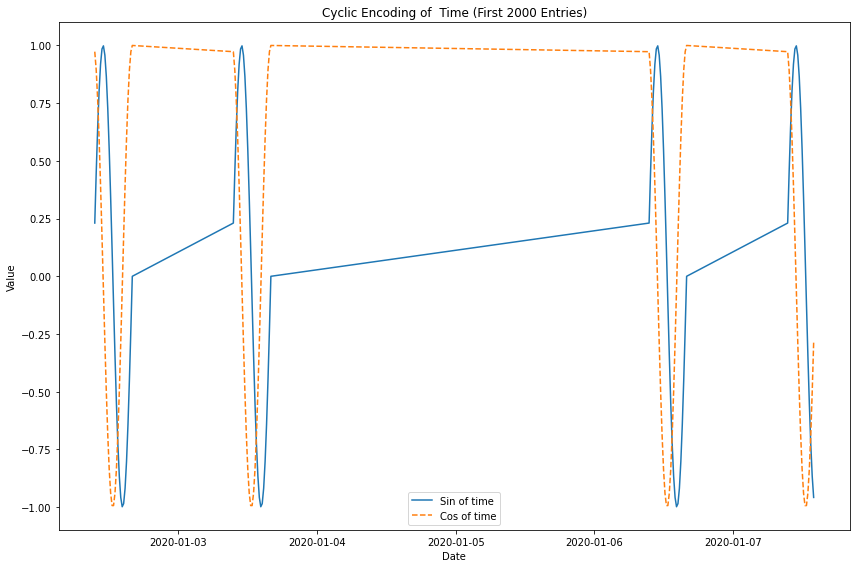

In [28]:
plt.figure(figsize=(12, 8))
plt.plot(df2.index[:100], df2['sin_time'][:100], label='Sin of time')
plt.plot(df2.index[:100], df2['cos_time'][:100], label='Cos of time', linestyle='--')
plt.title('Cyclic Encoding of  Time (First 2000 Entries)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()

## 3. radial basis functions 径向基函数

In [29]:
df2['135_weekday'] = (np.arange(len(df2)) % 135) + 1
df2
#27*5=135

C:\Users\lenovo\AppData\Local\Temp\ipykernel_19868\1576429978.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['135_weekday'] = (np.arange(len(df2)) % 135) + 1


,Open,High,Low,Close,Volume,Weekday,index_time,numeric_day,sin_weekday,cos_weekday,sin_time,cos_time,135_weekday
Datetime,,,,,,,,,,,,,
2020-01-02 09:30:00,3222.0242,3223.5637,3221.1500,3222.5240,3156623.0,Thursday,1,3,-0.587785,-0.809017,2.306159e-01,0.973045,1
2020-01-02 09:45:00,3223.0966,3224.0507,3222.4287,3223.2155,1074391.0,Thursday,2,3,-0.587785,-0.809017,4.487992e-01,0.893633,2
2020-01-02 10:00:00,3222.3200,3222.9250,3221.2300,3221.7218,985951.0,Thursday,3,3,-0.587785,-0.809017,6.427876e-01,0.766044,3
2020-01-02 10:15:00,3213.7430,3214.6533,3212.4418,3213.6835,1100095.0,Thursday,4,3,-0.587785,-0.809017,8.021232e-01,0.597159,4
2020-01-02 10:30:00,3214.1012,3214.7300,3213.2952,3214.0320,643005.0,Thursday,5,3,-0.587785,-0.809017,9.182161e-01,0.396080,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-31 15:00:00,5680.8373,5682.2750,5679.9114,5681.2730,658377.0,Thursday,23,3,-0.587785,-0.809017,-8.021232e-01,0.597159,77
2023-08-31 15:15:00,5683.4544,5684.4101,5682.1879,5683.3616,595590.0,Thursday,24,3,-0.587785,-0.809017,-6.427876e-01,0.766044,78
2023-08-31 15:30:00,5684.1963,5685.3850,5683.3066,5684.7036,635705.0,Thursday,25,3,-0.587785,-0.809017,-4.487992e-01,0.893633,79


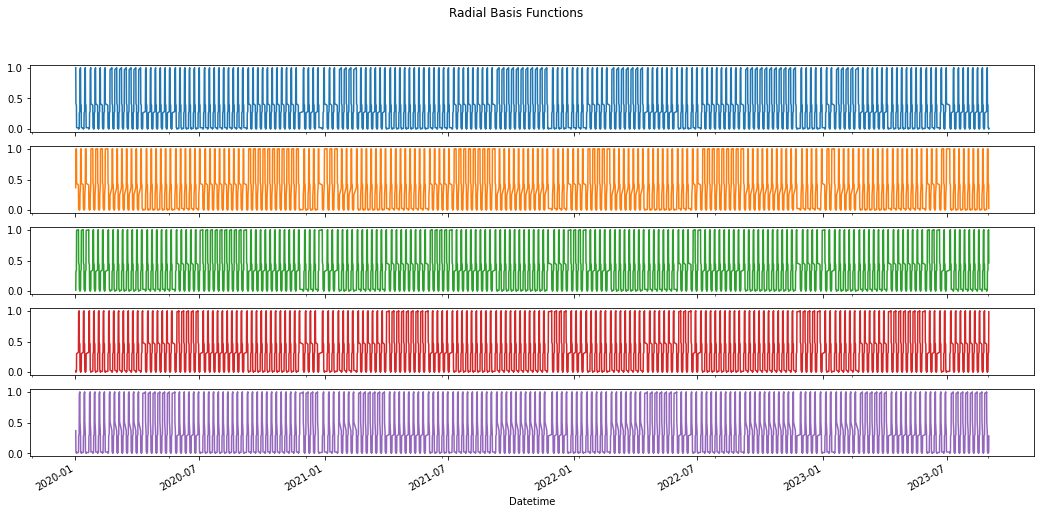

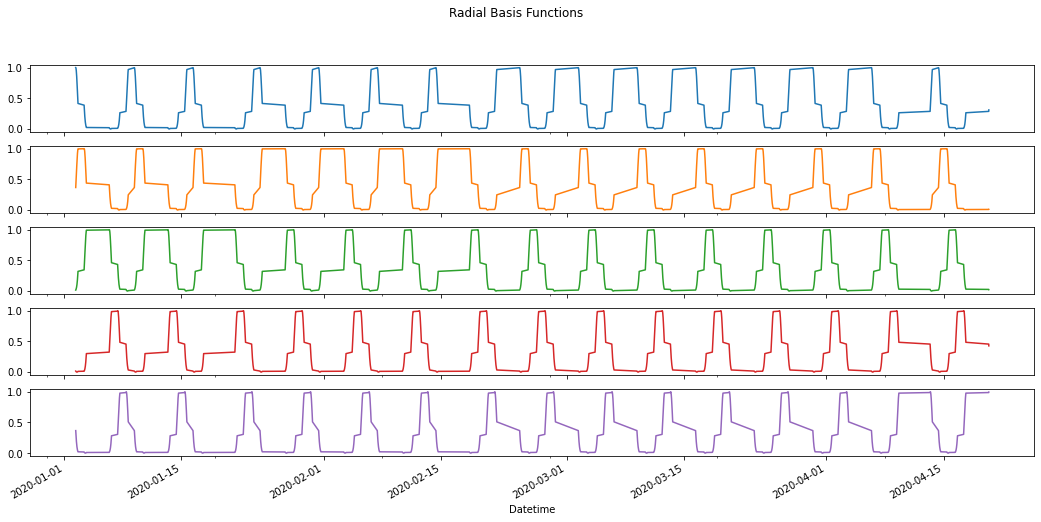

In [30]:
from sklego.preprocessing import RepeatingBasisFunction

rbf = RepeatingBasisFunction(n_periods=5,
                             column="135_weekday",
                             input_range=(1,140),
                             remainder="drop")
rbf.fit(df2)

X_3 = pd.DataFrame(data=rbf.transform(df2), index=df2.index)
X_3.plot(subplots=True, figsize=(18, 8),  
         sharex=True, title="Radial Basis Functions",
         legend=False)
plt.show()
X_3.iloc[:2000].plot(subplots=True, figsize=(18, 8), sharex=True, title="Radial Basis Functions", legend=False)
plt.show()

In [36]:
df3 = pd.concat([df2, X_3], axis=1)
df3

,Open,High,Low,Close,Volume,Weekday,index_time,numeric_day,sin_weekday,cos_weekday,sin_time,cos_time,135_weekday,0,1,2,3,4
Datetime,,,,,,,,,,,,,,,,,,
2020-01-02 09:30:00,3222.0242,3223.5637,3221.1500,3222.5240,3156623.0,Thursday,1,3,-0.587785,-0.809017,2.306159e-01,0.973045,1,1.000000,0.367879,0.018316,0.018316,0.367879
2020-01-02 09:45:00,3223.0966,3224.0507,3222.4287,3223.2155,1074391.0,Thursday,2,3,-0.587785,-0.809017,4.487992e-01,0.893633,2,0.998707,0.394810,0.021123,0.015841,0.341900
2020-01-02 10:00:00,3222.3200,3222.9250,3221.2300,3221.7218,985951.0,Thursday,3,3,-0.587785,-0.809017,6.427876e-01,0.766044,3,0.994838,0.422616,0.024297,0.013665,0.316934
2020-01-02 10:15:00,3213.7430,3214.6533,3212.4418,3213.6835,1100095.0,Thursday,4,3,-0.587785,-0.809017,8.021232e-01,0.597159,4,0.988422,0.451212,0.027876,0.011757,0.293032
2020-01-02 10:30:00,3214.1012,3214.7300,3213.2952,3214.0320,643005.0,Thursday,5,3,-0.587785,-0.809017,9.182161e-01,0.396080,5,0.979510,0.480498,0.031900,0.010090,0.270232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-31 15:00:00,5680.8373,5682.2750,5679.9114,5681.2730,658377.0,Thursday,23,3,-0.587785,-0.809017,-8.021232e-01,0.597159,77,0.005883,0.049484,0.583634,0.931596,0.201246
2023-08-31 15:15:00,5683.4544,5684.4101,5682.1879,5683.3616,595590.0,Thursday,24,3,-0.587785,-0.809017,-6.427876e-01,0.766044,78,0.006916,0.043625,0.552906,0.948381,0.220153
2023-08-31 15:30:00,5684.1963,5685.3850,5683.3066,5684.7036,635705.0,Thursday,25,3,-0.587785,-0.809017,-4.487992e-01,0.893633,79,0.008110,0.038360,0.522442,0.962972,0.240215


In [37]:
returns = df3['Close'].pct_change()
df4 = df3.drop(columns=['High', 'Low', 'Close','Open','Weekday','135_weekday'])
df4 = pd.concat([df4, returns.rename('Returns')], axis=1)
df4 = df4.fillna(0)
df4

,Volume,index_time,numeric_day,sin_weekday,cos_weekday,sin_time,cos_time,0,1,2,3,4,Returns
Datetime,,,,,,,,,,,,,
2020-01-02 09:30:00,3156623.0,1,3,-0.587785,-0.809017,2.306159e-01,0.973045,1.000000,0.367879,0.018316,0.018316,0.367879,0.000000
2020-01-02 09:45:00,1074391.0,2,3,-0.587785,-0.809017,4.487992e-01,0.893633,0.998707,0.394810,0.021123,0.015841,0.341900,0.000215
2020-01-02 10:00:00,985951.0,3,3,-0.587785,-0.809017,6.427876e-01,0.766044,0.994838,0.422616,0.024297,0.013665,0.316934,-0.000463
2020-01-02 10:15:00,1100095.0,4,3,-0.587785,-0.809017,8.021232e-01,0.597159,0.988422,0.451212,0.027876,0.011757,0.293032,-0.002495
2020-01-02 10:30:00,643005.0,5,3,-0.587785,-0.809017,9.182161e-01,0.396080,0.979510,0.480498,0.031900,0.010090,0.270232,0.000108
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-31 15:00:00,658377.0,23,3,-0.587785,-0.809017,-8.021232e-01,0.597159,0.005883,0.049484,0.583634,0.931596,0.201246,0.000755
2023-08-31 15:15:00,595590.0,24,3,-0.587785,-0.809017,-6.427876e-01,0.766044,0.006916,0.043625,0.552906,0.948381,0.220153,0.000368
2023-08-31 15:30:00,635705.0,25,3,-0.587785,-0.809017,-4.487992e-01,0.893633,0.008110,0.038360,0.522442,0.962972,0.240215,0.000236


将Returns放在第二列 将后面0 1 2 3 4 列分别命名为ra0 ra1 ra2 ra3 ra4

In [38]:
other_columns = [col for col in df4.columns if col != 'Returns']
new_order = [other_columns[0], 'Returns'] + other_columns[1:]
df5= df4[new_order]
rename_dict = {df5.columns[i + 8]: f'ra{i}' for i in range(5)}
df5.rename(columns=rename_dict, inplace=True)
df5

,Volume,Returns,index_time,numeric_day,sin_weekday,cos_weekday,sin_time,cos_time,ra0,ra1,ra2,ra3,ra4
Datetime,,,,,,,,,,,,,
2020-01-02 09:30:00,3156623.0,0.000000,1,3,-0.587785,-0.809017,2.306159e-01,0.973045,1.000000,0.367879,0.018316,0.018316,0.367879
2020-01-02 09:45:00,1074391.0,0.000215,2,3,-0.587785,-0.809017,4.487992e-01,0.893633,0.998707,0.394810,0.021123,0.015841,0.341900
2020-01-02 10:00:00,985951.0,-0.000463,3,3,-0.587785,-0.809017,6.427876e-01,0.766044,0.994838,0.422616,0.024297,0.013665,0.316934
2020-01-02 10:15:00,1100095.0,-0.002495,4,3,-0.587785,-0.809017,8.021232e-01,0.597159,0.988422,0.451212,0.027876,0.011757,0.293032
2020-01-02 10:30:00,643005.0,0.000108,5,3,-0.587785,-0.809017,9.182161e-01,0.396080,0.979510,0.480498,0.031900,0.010090,0.270232
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-31 15:00:00,658377.0,0.000755,23,3,-0.587785,-0.809017,-8.021232e-01,0.597159,0.005883,0.049484,0.583634,0.931596,0.201246
2023-08-31 15:15:00,595590.0,0.000368,24,3,-0.587785,-0.809017,-6.427876e-01,0.766044,0.006916,0.043625,0.552906,0.948381,0.220153
2023-08-31 15:30:00,635705.0,0.000236,25,3,-0.587785,-0.809017,-4.487992e-01,0.893633,0.008110,0.038360,0.522442,0.962972,0.240215


# Save data

In [41]:
dfbasic = df5.drop(columns=['index_time', 'numeric_day', 'sin_weekday','cos_weekday','ra0','ra1','ra2','ra3','ra4','sin_time','cos_time'])
dfbasic

,Volume,Returns
Datetime,,
2020-01-02 09:30:00,3156623.0,0.000000
2020-01-02 09:45:00,1074391.0,0.000215
2020-01-02 10:00:00,985951.0,-0.000463
2020-01-02 10:15:00,1100095.0,-0.002495
2020-01-02 10:30:00,643005.0,0.000108
...,...,...
2023-08-31 15:00:00,658377.0,0.000755
2023-08-31 15:15:00,595590.0,0.000368
2023-08-31 15:30:00,635705.0,0.000236


In [42]:
dfdu = df5.drop(columns=['sin_weekday','cos_weekday','ra0','ra1','ra2','ra3','ra4','sin_time','cos_time'])
dfdu

,Volume,Returns,index_time,numeric_day
Datetime,,,,
2020-01-02 09:30:00,3156623.0,0.000000,1,3
2020-01-02 09:45:00,1074391.0,0.000215,2,3
2020-01-02 10:00:00,985951.0,-0.000463,3,3
2020-01-02 10:15:00,1100095.0,-0.002495,4,3
2020-01-02 10:30:00,643005.0,0.000108,5,3
...,...,...,...,...
2023-08-31 15:00:00,658377.0,0.000755,23,3
2023-08-31 15:15:00,595590.0,0.000368,24,3
2023-08-31 15:30:00,635705.0,0.000236,25,3


In [43]:
dfsc = df5.drop(columns=['index_time', 'numeric_day', 'ra0','ra1','ra2','ra3','ra4'])
dfsc

,Volume,Returns,sin_weekday,cos_weekday,sin_time,cos_time
Datetime,,,,,,
2020-01-02 09:30:00,3156623.0,0.000000,-0.587785,-0.809017,2.306159e-01,0.973045
2020-01-02 09:45:00,1074391.0,0.000215,-0.587785,-0.809017,4.487992e-01,0.893633
2020-01-02 10:00:00,985951.0,-0.000463,-0.587785,-0.809017,6.427876e-01,0.766044
2020-01-02 10:15:00,1100095.0,-0.002495,-0.587785,-0.809017,8.021232e-01,0.597159
2020-01-02 10:30:00,643005.0,0.000108,-0.587785,-0.809017,9.182161e-01,0.396080
...,...,...,...,...,...,...
2023-08-31 15:00:00,658377.0,0.000755,-0.587785,-0.809017,-8.021232e-01,0.597159
2023-08-31 15:15:00,595590.0,0.000368,-0.587785,-0.809017,-6.427876e-01,0.766044
2023-08-31 15:30:00,635705.0,0.000236,-0.587785,-0.809017,-4.487992e-01,0.893633


In [45]:
dfra = df5.drop(columns=['index_time', 'numeric_day', 'sin_weekday','cos_weekday','sin_time','cos_time'])
dfra

,Volume,Returns,ra0,ra1,ra2,ra3,ra4
Datetime,,,,,,,
2020-01-02 09:30:00,3156623.0,0.000000,1.000000,0.367879,0.018316,0.018316,0.367879
2020-01-02 09:45:00,1074391.0,0.000215,0.998707,0.394810,0.021123,0.015841,0.341900
2020-01-02 10:00:00,985951.0,-0.000463,0.994838,0.422616,0.024297,0.013665,0.316934
2020-01-02 10:15:00,1100095.0,-0.002495,0.988422,0.451212,0.027876,0.011757,0.293032
2020-01-02 10:30:00,643005.0,0.000108,0.979510,0.480498,0.031900,0.010090,0.270232
...,...,...,...,...,...,...,...
2023-08-31 15:00:00,658377.0,0.000755,0.005883,0.049484,0.583634,0.931596,0.201246
2023-08-31 15:15:00,595590.0,0.000368,0.006916,0.043625,0.552906,0.948381,0.220153
2023-08-31 15:30:00,635705.0,0.000236,0.008110,0.038360,0.522442,0.962972,0.240215


In [46]:
%store df5
%store dfbasic
%store dfdu
%store dfsc
%store dfra

Stored 'df5' (DataFrame)
Stored 'dfbasic' (DataFrame)
Stored 'dfdu' (DataFrame)
Stored 'dfsc' (DataFrame)
Stored 'dfra' (DataFrame)


In [48]:
dfbasic2020 = dfbasic.loc['2020-01-01 09:30':]
dfdu2020 = dfdu.loc['2020-01-01 09:30':]
dfsc2020 = dfsc.loc['2020-01-01 09:30':]
dfra2020 = dfra.loc['2020-01-01 09:30':]
%store dfbasic2020
%store dfdu2020
%store dfsc2020
%store dfra2020

Stored 'dfbasic2020' (DataFrame)
Stored 'dfdu2020' (DataFrame)
Stored 'dfsc2020' (DataFrame)
Stored 'dfra2020' (DataFrame)


# 3. CEEMDAN

In [49]:
df6 = df5.drop(columns=['index_time', 'numeric_day', 'sin_weekday','cos_weekday','ra0','ra1','ra2','ra3','ra4','Returns','sin_time','cos_time'])
df6

,Volume
Datetime,
2020-01-02 09:30:00,3156623.0
2020-01-02 09:45:00,1074391.0
2020-01-02 10:00:00,985951.0
2020-01-02 10:15:00,1100095.0
2020-01-02 10:30:00,643005.0
...,...
2023-08-31 15:00:00,658377.0
2023-08-31 15:15:00,595590.0
2023-08-31 15:30:00,635705.0


In [69]:
from PyEMD import CEEMDAN
from PyEMD import Visualisation
import scipy
import statsmodels as sm

In [70]:
# Create a function for CEEMDAN
def apply_ceemdan(signal):
    ceemdan = CEEMDAN()
    imfs_and_residue = ceemdan(signal)
    return imfs_and_residue

# Extract the 'Volume' column as a numpy array
volume_data = df6['Volume'].values

# Apply CEEMDAN to the 'Volume' column
imfs_and_residue = apply_ceemdan(volume_data)

# The last row is the residue
num_imfs = imfs_and_residue.shape[0] - 1  # Subtracting 1 to exclude the residue
residue = imfs_and_residue[-1]

# Add the decomposed IMFs and residue back to the DataFrame
for i in range(num_imfs):
    df6[f"imfs_{i+1}"] = imfs_and_residue[i]

# Add residue as the last 'imf' column
df6['residue'] = residue

# Display the DataFrame with the IMFs and residue
print(df6)

                        Volume        imfs_1         imfs_2         imfs_3  \
Datetime                                                                     
2020-01-02 09:30:00  3156623.0  3.425878e+05  292430.801078  271037.166858   
2020-01-02 09:45:00  1074391.0 -3.392435e+05 -290092.923265 -102809.478796   
2020-01-02 10:00:00   985951.0  1.733011e+05 -236629.019618 -305828.899131   
2020-01-02 10:15:00  1100095.0  3.229194e+05   98877.075664 -275054.387457   
2020-01-02 10:30:00   643005.0 -1.646419e+05  270897.795246 -110980.599627   
...                        ...           ...            ...            ...   
2023-08-31 15:00:00   658377.0  7.138254e+05 -355801.935396 -352098.684035   
2023-08-31 15:15:00   595590.0 -1.774186e+05 -243697.696830  -69357.168007   
2023-08-31 15:30:00   635705.0 -1.183982e+06   79907.072946  267575.769921   
2023-08-31 15:45:00  3695453.0  1.222784e+06  373711.733619  422559.401309   
2023-08-31 16:00:00   481470.0 -1.235929e+06 -103600.892049  221

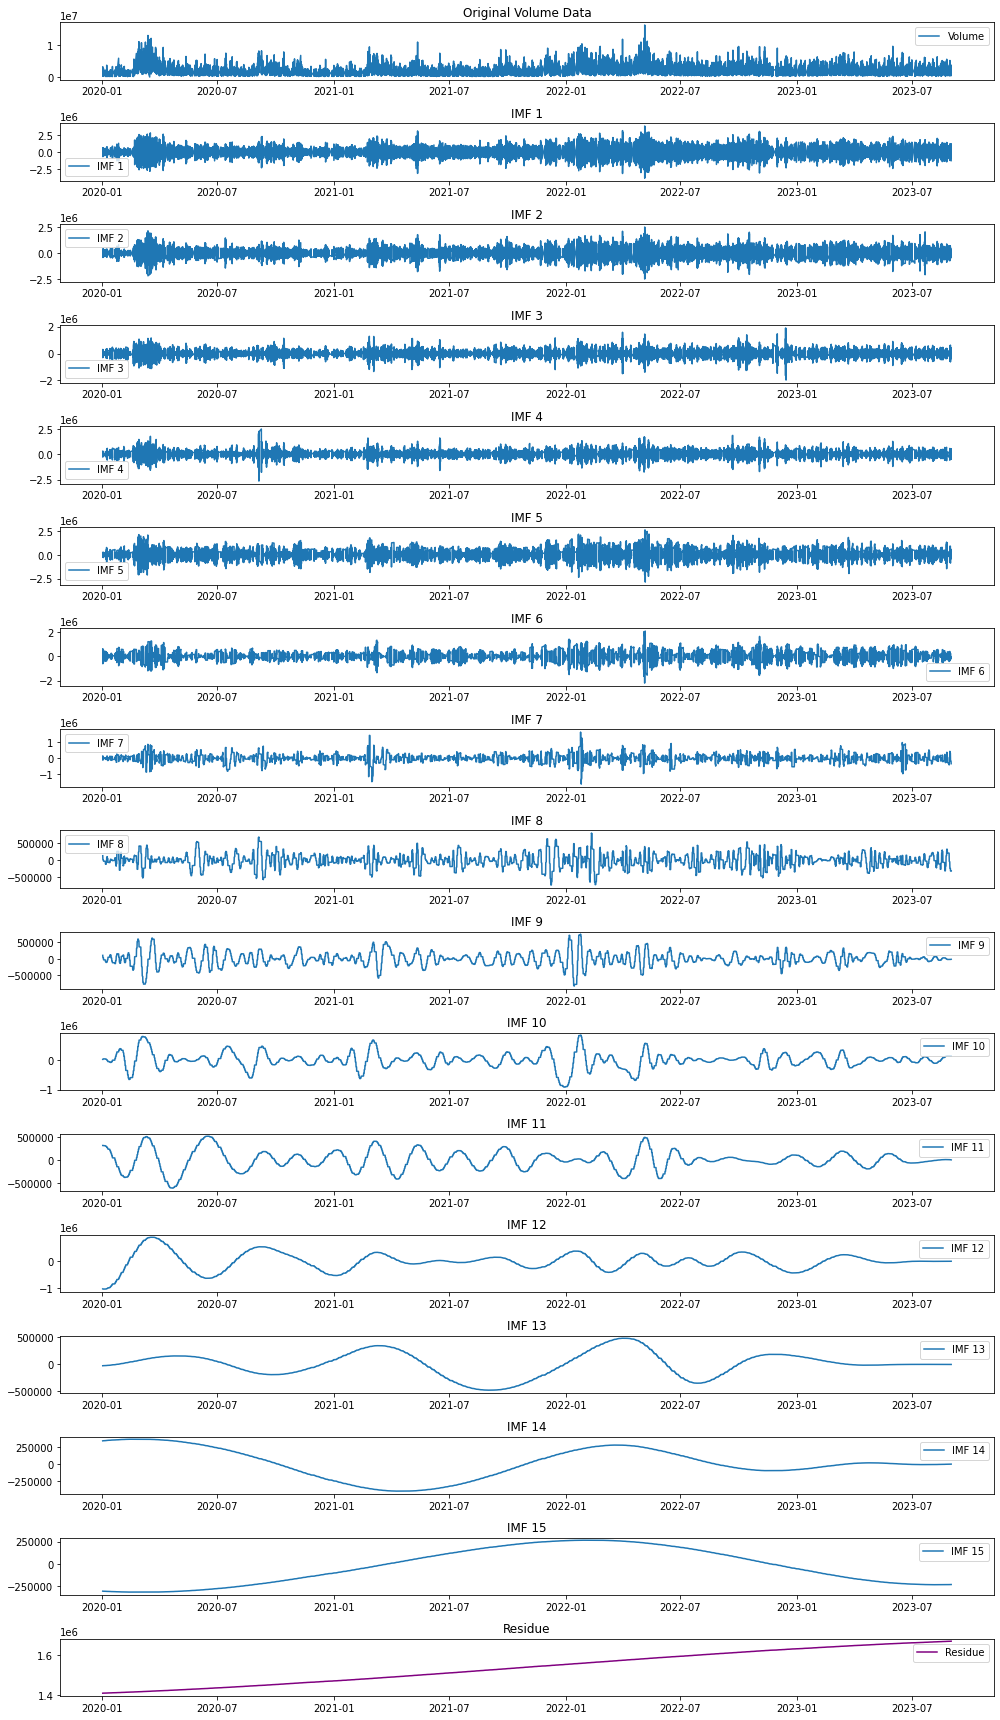

In [71]:
plt.figure(figsize=(14, 24))
plt.subplot(num_imfs + 2, 1, 1)  # Add 2 for the residue plot
plt.plot(df6.index, df6['Volume'], label='Volume')
plt.title('Original Volume Data')
plt.legend()

for i in range(num_imfs):
    plt.subplot(num_imfs + 2, 1, i + 2)  # Changed to num_imfs + 2
    plt.plot(df6.index, df6[f"imfs_{i+1}"], label=f"IMF {i+1}")
    plt.title(f"IMF {i+1}")
    plt.legend()

plt.subplot(num_imfs + 2, 1, num_imfs + 2)  # The last plot for the residue
plt.plot(df6.index, df6['residue'], label='Residue', color='purple')
plt.title('Residue')
plt.legend()
plt.tight_layout()
plt.show()

In [72]:
df6

,Volume,imfs_1,imfs_2,imfs_3,imfs_4,imfs_5,imfs_6,imfs_7,imfs_8,imfs_9,imfs_10,imfs_11,imfs_12,imfs_13,imfs_14,imfs_15,residue
Datetime,,,,,,,,,,,,,,,,,
2020-01-02 09:30:00,3156623.0,3.425878e+05,292430.801078,271037.166858,280809.020173,241248.784131,630194.128071,136317.242947,128360.592514,103700.149166,11274.801514,314287.590768,-1.018098e+06,-33015.770178,348659.735621,-302966.125291,1.409795e+06
2020-01-02 09:45:00,1074391.0,-3.392435e+05,-290092.923265,-102809.478796,99967.361758,121257.357423,513156.590685,116204.541055,124384.249261,101289.154413,11806.234321,314357.478306,-1.018416e+06,-32992.305989,348705.702020,-302985.372801,1.409802e+06
2020-01-02 10:00:00,985951.0,1.733011e+05,-236629.019618,-305828.899131,-79048.844963,2547.594810,386381.692930,95581.780195,120171.346098,98862.489805,12330.948153,314422.281282,-1.018728e+06,-32968.647580,348751.628862,-303004.605135,1.409808e+06
2020-01-02 10:15:00,1100095.0,3.229194e+05,98877.075664,-275054.387457,-214663.643668,-103474.646389,253696.379661,74686.332556,115747.891999,96420.825795,12848.867686,314481.994694,-1.019034e+06,-32944.794856,348797.516139,-303023.822291,1.409814e+06
2020-01-02 10:30:00,643005.0,-1.646419e+05,270897.795246,-110980.599627,-275916.054016,-185403.508856,118927.595732,53755.570324,111139.895936,93964.832836,13359.917597,314536.613539,-1.019335e+06,-32920.747722,348843.363844,-303043.024267,1.409821e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-31 15:00:00,658377.0,7.138254e+05,-355801.935396,-352098.684035,-251317.787810,161285.770592,-162787.337894,-330586.706619,-318596.128128,-15309.398769,130425.865831,2558.251873,3.760013e+03,-9241.341322,1474.532342,-228982.749637,1.669769e+06
2023-08-31 15:15:00,595590.0,-1.774186e+05,-243697.696830,-69357.168007,72608.998078,260142.058261,-149405.831693,-333403.552848,-318316.915751,-15220.872203,130352.701023,2479.352305,3.785881e+03,-9247.951251,1486.756785,-228972.889360,1.669776e+06
2023-08-31 15:30:00,635705.0,-1.183982e+06,79907.072946,267575.769921,370545.122558,334402.864129,-133485.026450,-335662.768148,-318017.003128,-15133.992002,130279.578080,2399.999430,3.811791e+03,-9254.598586,1498.976276,-228963.006564,1.669782e+06


In [74]:
dfimfs = df6.copy()
dfimfs

,Volume,imfs_1,imfs_2,imfs_3,imfs_4,imfs_5,imfs_6,imfs_7,imfs_8,imfs_9,imfs_10,imfs_11,imfs_12,imfs_13,imfs_14,imfs_15,residue
Datetime,,,,,,,,,,,,,,,,,
2020-01-02 09:30:00,3156623.0,3.425878e+05,292430.801078,271037.166858,280809.020173,241248.784131,630194.128071,136317.242947,128360.592514,103700.149166,11274.801514,314287.590768,-1.018098e+06,-33015.770178,348659.735621,-302966.125291,1.409795e+06
2020-01-02 09:45:00,1074391.0,-3.392435e+05,-290092.923265,-102809.478796,99967.361758,121257.357423,513156.590685,116204.541055,124384.249261,101289.154413,11806.234321,314357.478306,-1.018416e+06,-32992.305989,348705.702020,-302985.372801,1.409802e+06
2020-01-02 10:00:00,985951.0,1.733011e+05,-236629.019618,-305828.899131,-79048.844963,2547.594810,386381.692930,95581.780195,120171.346098,98862.489805,12330.948153,314422.281282,-1.018728e+06,-32968.647580,348751.628862,-303004.605135,1.409808e+06
2020-01-02 10:15:00,1100095.0,3.229194e+05,98877.075664,-275054.387457,-214663.643668,-103474.646389,253696.379661,74686.332556,115747.891999,96420.825795,12848.867686,314481.994694,-1.019034e+06,-32944.794856,348797.516139,-303023.822291,1.409814e+06
2020-01-02 10:30:00,643005.0,-1.646419e+05,270897.795246,-110980.599627,-275916.054016,-185403.508856,118927.595732,53755.570324,111139.895936,93964.832836,13359.917597,314536.613539,-1.019335e+06,-32920.747722,348843.363844,-303043.024267,1.409821e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-31 15:00:00,658377.0,7.138254e+05,-355801.935396,-352098.684035,-251317.787810,161285.770592,-162787.337894,-330586.706619,-318596.128128,-15309.398769,130425.865831,2558.251873,3.760013e+03,-9241.341322,1474.532342,-228982.749637,1.669769e+06
2023-08-31 15:15:00,595590.0,-1.774186e+05,-243697.696830,-69357.168007,72608.998078,260142.058261,-149405.831693,-333403.552848,-318316.915751,-15220.872203,130352.701023,2479.352305,3.785881e+03,-9247.951251,1486.756785,-228972.889360,1.669776e+06
2023-08-31 15:30:00,635705.0,-1.183982e+06,79907.072946,267575.769921,370545.122558,334402.864129,-133485.026450,-335662.768148,-318017.003128,-15133.992002,130279.578080,2399.999430,3.811791e+03,-9254.598586,1498.976276,-228963.006564,1.669782e+06


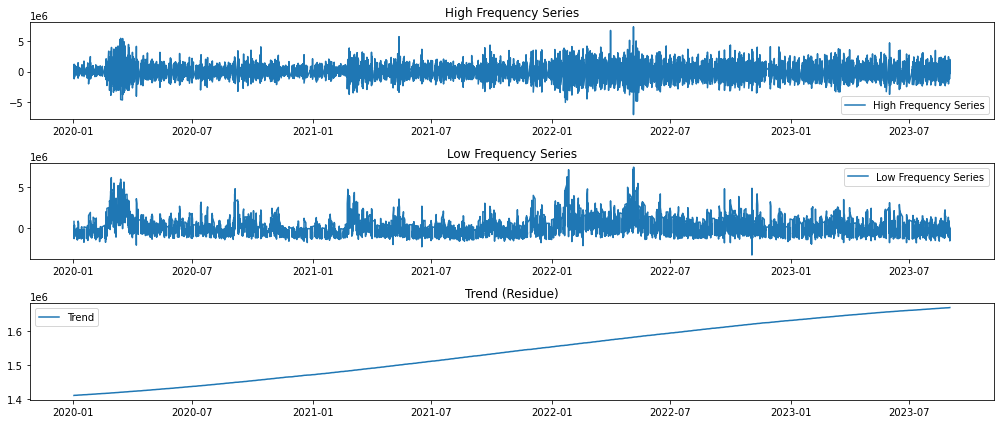

In [75]:
from scipy import stats

# Set P value
p_value_threshold = 0.05
high_freq_imfs = []
low_freq_imfs = []
trend = df6['residue']  
found_threshold = False  # mark the IMF first smaller than P

for i in range(1, num_imfs+1):
    imf_col = f'imfs_{i}'
    t_stat, p_value = stats.ttest_1samp(df6[imf_col], 0)
    
    if p_value < p_value_threshold and not found_threshold:
        found_threshold = True
        low_freq_imfs.append(df6[imf_col])
    elif not found_threshold:
        high_freq_imfs.append(df6[imf_col])
    else:
        low_freq_imfs.append(df6[imf_col])

# Sum high and low
high_freq_series = np.sum(high_freq_imfs, axis=0) if high_freq_imfs else np.zeros(len(df6))
low_freq_series = np.sum(low_freq_imfs, axis=0) if low_freq_imfs else np.zeros(len(df6))

for i in range(1, num_imfs+1):
    df6.drop(columns=[f'imfs_{i}'], inplace=True)

df6['high_freq_series'] = high_freq_series
df6['low_freq_series'] = low_freq_series
df6['trend'] = trend

plt.figure(figsize=(14, 6))

plt.subplot(3, 1, 1)
plt.plot(df6.index, df6['high_freq_series'], label='High Frequency Series')
plt.title('High Frequency Series')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(df6.index, df6['low_freq_series'], label='Low Frequency Series')
plt.title('Low Frequency Series')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(df6.index, df6['trend'], label='Trend')
plt.title('Trend (Residue)')
plt.legend()

plt.tight_layout()
plt.show()


In [76]:
high_freq_imfs #we could know 123 is high 456..14 is low

[Datetime
 2020-01-02 09:30:00    3.425878e+05
 2020-01-02 09:45:00   -3.392435e+05
 2020-01-02 10:00:00    1.733011e+05
 2020-01-02 10:15:00    3.229194e+05
 2020-01-02 10:30:00   -1.646419e+05
                            ...     
 2023-08-31 15:00:00    7.138254e+05
 2023-08-31 15:15:00   -1.774186e+05
 2023-08-31 15:30:00   -1.183982e+06
 2023-08-31 15:45:00    1.222784e+06
 2023-08-31 16:00:00   -1.235929e+06
 Name: imfs_1, Length: 24786, dtype: float64,
 Datetime
 2020-01-02 09:30:00    292430.801078
 2020-01-02 09:45:00   -290092.923265
 2020-01-02 10:00:00   -236629.019618
 2020-01-02 10:15:00     98877.075664
 2020-01-02 10:30:00    270897.795246
                            ...      
 2023-08-31 15:00:00   -355801.935396
 2023-08-31 15:15:00   -243697.696830
 2023-08-31 15:30:00     79907.072946
 2023-08-31 15:45:00    373711.733619
 2023-08-31 16:00:00   -103600.892049
 Name: imfs_2, Length: 24786, dtype: float64,
 Datetime
 2020-01-02 09:30:00    271037.166858
 2020-01-02 09:

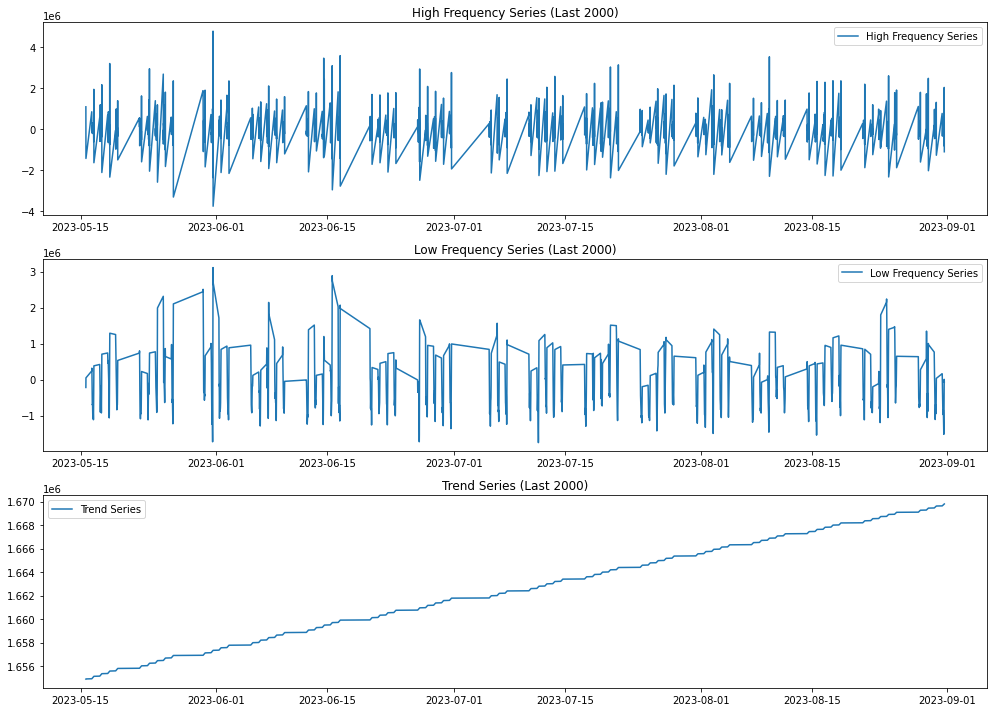

In [77]:
df6_last_2000 = df6.iloc[-2000:]
plt.figure(figsize=(14, 10))
plt.subplot(3, 1, 1)
plt.plot(df6_last_2000.index, df6_last_2000['high_freq_series'], label='High Frequency Series')
plt.title('High Frequency Series (Last 2000)')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(df6_last_2000.index, df6_last_2000['low_freq_series'], label='Low Frequency Series')
plt.title('Low Frequency Series (Last 2000)')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(df6_last_2000.index, df6_last_2000['trend'], label='Trend Series')
plt.title('Trend Series (Last 2000)')
plt.legend()

plt.tight_layout()
plt.show()

### SAVE DATA

In [78]:
df6

,Volume,residue,high_freq_series,low_freq_series,trend
Datetime,,,,,
2020-01-02 09:30:00,3156623.0,1.409795e+06,9.060558e+05,8.407721e+05,1.409795e+06
2020-01-02 09:45:00,1074391.0,1.409802e+06,-7.321459e+05,3.967354e+05,1.409802e+06
2020-01-02 10:00:00,985951.0,1.409808e+06,-3.691569e+05,-5.470000e+04,1.409808e+06
2020-01-02 10:15:00,1100095.0,1.409814e+06,1.467421e+05,-4.564613e+05,1.409814e+06
2020-01-02 10:30:00,643005.0,1.409821e+06,-4.724748e+03,-7.620908e+05,1.409821e+06
...,...,...,...,...,...
2023-08-31 15:00:00,658377.0,1.669769e+06,5.924827e+03,-1.017317e+06,1.669769e+06
2023-08-31 15:15:00,595590.0,1.669776e+06,-4.904735e+05,-5.837123e+05,1.669776e+06
2023-08-31 15:30:00,635705.0,1.669782e+06,-8.364992e+05,-1.975781e+05,1.669782e+06


In [79]:
dfce=df6 .drop(columns=['residue'])
dfce

,Volume,high_freq_series,low_freq_series,trend
Datetime,,,,
2020-01-02 09:30:00,3156623.0,9.060558e+05,8.407721e+05,1.409795e+06
2020-01-02 09:45:00,1074391.0,-7.321459e+05,3.967354e+05,1.409802e+06
2020-01-02 10:00:00,985951.0,-3.691569e+05,-5.470000e+04,1.409808e+06
2020-01-02 10:15:00,1100095.0,1.467421e+05,-4.564613e+05,1.409814e+06
2020-01-02 10:30:00,643005.0,-4.724748e+03,-7.620908e+05,1.409821e+06
...,...,...,...,...
2023-08-31 15:00:00,658377.0,5.924827e+03,-1.017317e+06,1.669769e+06
2023-08-31 15:15:00,595590.0,-4.904735e+05,-5.837123e+05,1.669776e+06
2023-08-31 15:30:00,635705.0,-8.364992e+05,-1.975781e+05,1.669782e+06


In [82]:
%store dfce
dfce2020 = dfce.loc['2020-01-01 09:30':]
%store dfce2020
dfce2020

,Volume,high_freq_series,low_freq_series,trend
Datetime,,,,
2020-01-02 09:30:00,3156623.0,9.060558e+05,8.407721e+05,1.409795e+06
2020-01-02 09:45:00,1074391.0,-7.321459e+05,3.967354e+05,1.409802e+06
2020-01-02 10:00:00,985951.0,-3.691569e+05,-5.470000e+04,1.409808e+06
2020-01-02 10:15:00,1100095.0,1.467421e+05,-4.564613e+05,1.409814e+06
2020-01-02 10:30:00,643005.0,-4.724748e+03,-7.620908e+05,1.409821e+06
...,...,...,...,...
2023-08-31 15:00:00,658377.0,5.924827e+03,-1.017317e+06,1.669769e+06
2023-08-31 15:15:00,595590.0,-4.904735e+05,-5.837123e+05,1.669776e+06
2023-08-31 15:30:00,635705.0,-8.364992e+05,-1.975781e+05,1.669782e+06


In [83]:
dfcehigh=dfce2020.drop(columns=['Volume','low_freq_series','trend'])
dfcehigh

,high_freq_series
Datetime,
2020-01-02 09:30:00,9.060558e+05
2020-01-02 09:45:00,-7.321459e+05
2020-01-02 10:00:00,-3.691569e+05
2020-01-02 10:15:00,1.467421e+05
2020-01-02 10:30:00,-4.724748e+03
...,...
2023-08-31 15:00:00,5.924827e+03
2023-08-31 15:15:00,-4.904735e+05
2023-08-31 15:30:00,-8.364992e+05


In [84]:
dfcelow=dfce2020.drop(columns=['high_freq_series','trend','Volume'])
dfcelow

,low_freq_series
Datetime,
2020-01-02 09:30:00,8.407721e+05
2020-01-02 09:45:00,3.967354e+05
2020-01-02 10:00:00,-5.470000e+04
2020-01-02 10:15:00,-4.564613e+05
2020-01-02 10:30:00,-7.620908e+05
...,...
2023-08-31 15:00:00,-1.017317e+06
2023-08-31 15:15:00,-5.837123e+05
2023-08-31 15:30:00,-1.975781e+05


In [85]:
dfcetrend=dfce2020.drop(columns=['Volume','high_freq_series','low_freq_series'])
dfcetrend

,trend
Datetime,
2020-01-02 09:30:00,1.409795e+06
2020-01-02 09:45:00,1.409802e+06
2020-01-02 10:00:00,1.409808e+06
2020-01-02 10:15:00,1.409814e+06
2020-01-02 10:30:00,1.409821e+06
...,...
2023-08-31 15:00:00,1.669769e+06
2023-08-31 15:15:00,1.669776e+06
2023-08-31 15:30:00,1.669782e+06


In [86]:
dfcevolume=dfce2020.drop(columns=['trend','high_freq_series','low_freq_series'])
dfcevolume

,Volume
Datetime,
2020-01-02 09:30:00,3156623.0
2020-01-02 09:45:00,1074391.0
2020-01-02 10:00:00,985951.0
2020-01-02 10:15:00,1100095.0
2020-01-02 10:30:00,643005.0
...,...
2023-08-31 15:00:00,658377.0
2023-08-31 15:15:00,595590.0
2023-08-31 15:30:00,635705.0


In [87]:
%store dfcehigh
%store dfcelow
%store dfcetrend
%store dfcevolume

Stored 'dfcehigh' (DataFrame)
Stored 'dfcelow' (DataFrame)
Stored 'dfcetrend' (DataFrame)
Stored 'dfcevolume' (DataFrame)


In [105]:
dfhigh12 = pd.DataFrame()  
dfhigh12['dfhigh12']= dfimfs['imfs_1'] + dfimfs['imfs_2']
dfhigh12

,dfhigh12
Datetime,
2020-01-02 09:30:00,6.350186e+05
2020-01-02 09:45:00,-6.293364e+05
2020-01-02 10:00:00,-6.332796e+04
2020-01-02 10:15:00,4.217965e+05
2020-01-02 10:30:00,1.062559e+05
...,...
2023-08-31 15:00:00,3.580235e+05
2023-08-31 15:15:00,-4.211163e+05
2023-08-31 15:30:00,-1.104075e+06


In [106]:
dfhigh23 = pd.DataFrame()
dfhigh23['dfhigh23'] = dfimfs['imfs_3'] + dfimfs['imfs_2']
dfhigh23

,dfhigh23
Datetime,
2020-01-02 09:30:00,563467.967936
2020-01-02 09:45:00,-392902.402061
2020-01-02 10:00:00,-542457.918750
2020-01-02 10:15:00,-176177.311793
2020-01-02 10:30:00,159917.195619
...,...
2023-08-31 15:00:00,-707900.619432
2023-08-31 15:15:00,-313054.864837
2023-08-31 15:30:00,347482.842867


In [107]:
dfhigh13 = pd.DataFrame()
dfhigh13['dfhigh13'] = dfimfs['imfs_3'] + dfimfs['imfs_1']
dfhigh13

,dfhigh23
Datetime,
2020-01-02 09:30:00,6.136250e+05
2020-01-02 09:45:00,-4.420530e+05
2020-01-02 10:00:00,-1.325278e+05
2020-01-02 10:15:00,4.786503e+04
2020-01-02 10:30:00,-2.756225e+05
...,...
2023-08-31 15:00:00,3.617268e+05
2023-08-31 15:15:00,-2.467758e+05
2023-08-31 15:30:00,-9.164063e+05


In [108]:
%store dfhigh12
%store dfhigh13
%store dfhigh23

Stored 'dfhigh12' (DataFrame)
Stored 'dfhigh13' (DataFrame)
Stored 'dfhigh23' (DataFrame)
